Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('Boston.csv')
print(df)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [40]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
rm=df.iloc[:,6]

In [42]:
rm

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [43]:
medv=df.iloc[:,14]

In [44]:
medv

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

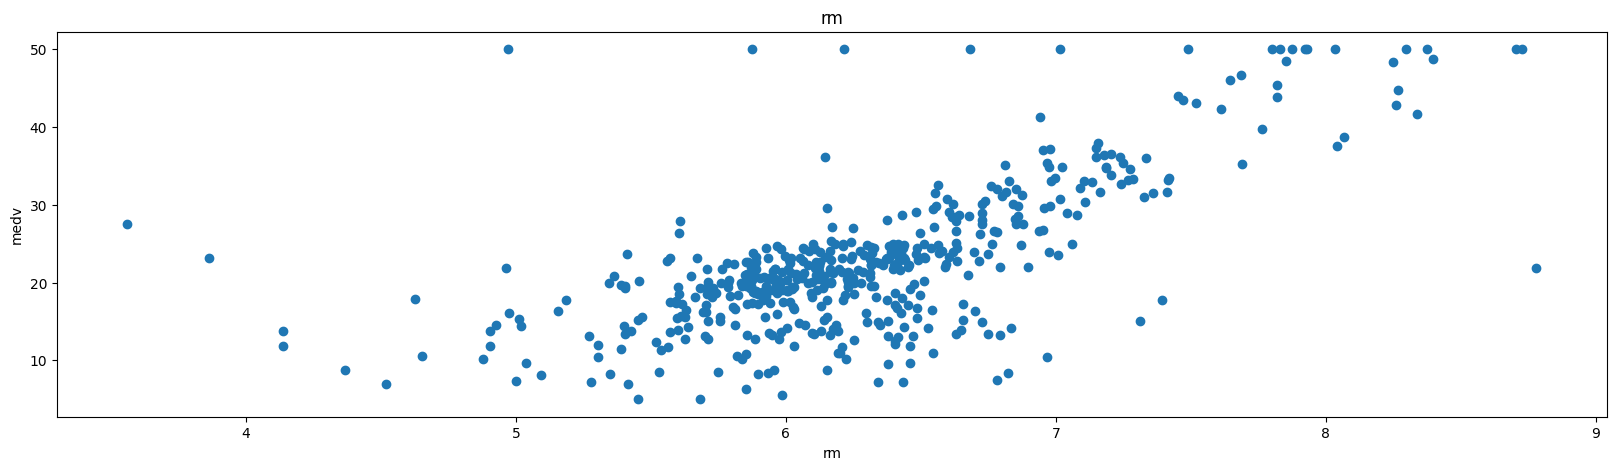

In [45]:
plt.figure(figsize=(20, 5))

features = ['rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

plt.show()

In [46]:
rm

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [75]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['crim'].plot(kind='hist', bins=20, title='crim')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['zn'].plot(kind='hist', bins=20, title='zn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['indus'].plot(kind='hist', bins=20, title='indus')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='crim', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='crim', y='zn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='zn', y='indus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='indus', y='chas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['crim'].plot(kind='line', figsize=(8, 4), title='crim')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['zn'].plot(kind='line', figsize=(8, 4), title='zn')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['indus'].plot(kind='line', figsize=(8, 4), title='indus')
plt.gca().spines[['top', 'right']].set_visible(False)

In [104]:
df.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [47]:
real_x = np.array(rm)
real_y = np.array(medv)

In [48]:
real_x

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [49]:
real_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**Batch Stochastic Gradient Descent** - wykorzystujemy **cały zbiór danych**

Definicja błędu:

In [50]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [51]:
import random

In [111]:
Loss = []
epochs = 2000
learning_rate = 0.02

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):

  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    #print(pred_y)
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())
    grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

In [112]:
np.max(Loss),np.min(Loss)

(497.1375, 45.838394)

In [113]:
print(a.numpy())
print(b.numpy())

6.984463
-21.200027


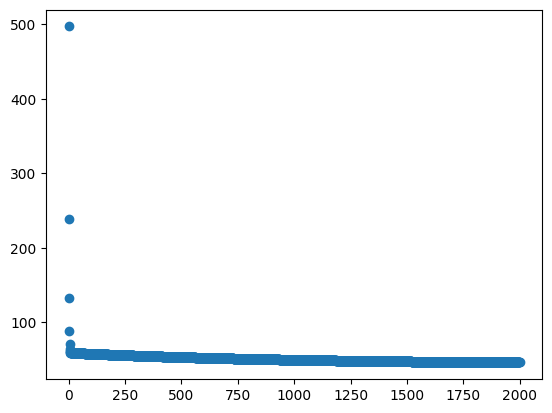

In [114]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [115]:
max = np.max(rm)
min = np.min(rm)

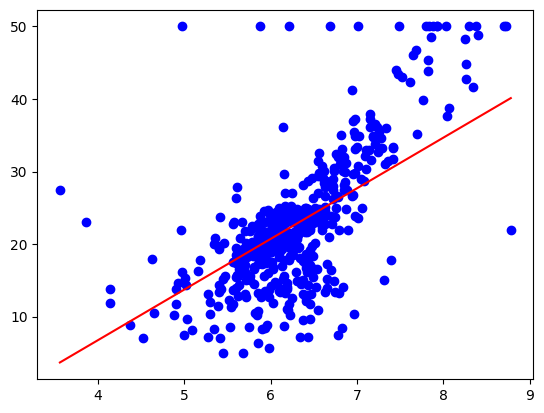

In [116]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(rm,medv,c="b")
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

Definiujemy tablicę:

In [117]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Mieszamy zawartość tablicy:

In [118]:
np.random.shuffle(arr)
arr

array([9, 0, 6, 1, 3, 5, 7, 2, 4, 8])

Funkcja do przetestowania:

In [119]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

Uzupełnik poniższy kod, tak aby możliwe było testowanie różnych wielkości próbki treningowwej.

In [124]:
def mini_batch_stochastic_gradient_descent(batch_size):
  Loss = []
  epochs = 2000
  learning_rate = 0.02
  batch_size = batch_size     #wielkość zbioru wykorzystanego do treningu

  a = tf.Variable(random.random())
  b = tf.Variable(random.random())

  for i in range(epochs):

    real_x_batch, real_y_batch = subset_dataset(real_x,real_y,batch_size)

    with tf.GradientTape() as tape:
      pred_y = a * real_x_batch + b
      loss = loss_fn(real_y_batch, pred_y)
      Loss.append(loss.numpy())

    dloss_da, dloss_db = tape.gradient(loss,(a, b))

    a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
    b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db
  print("last one loss", str(loss))

  plt.scatter(np.arange(epochs),Loss)
  plt.show()
  max = np.max(rm)
  min = np.min(rm)
  X = np.linspace(min, max, num=10)
  plt.plot(X,a.numpy()*X+b.numpy(),c='r')
  plt.scatter(rm,medv,c="b")
  plt.show()


last one loss tf.Tensor(3.2077029, shape=(), dtype=float32)


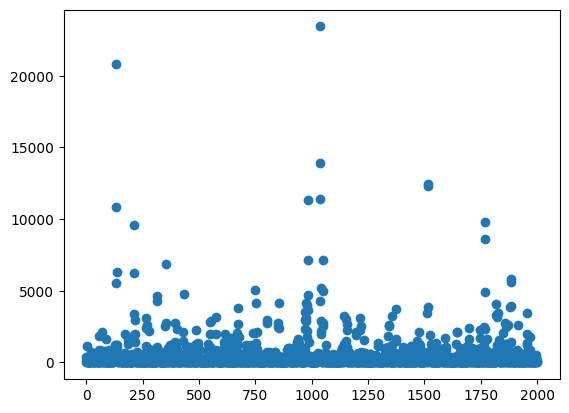

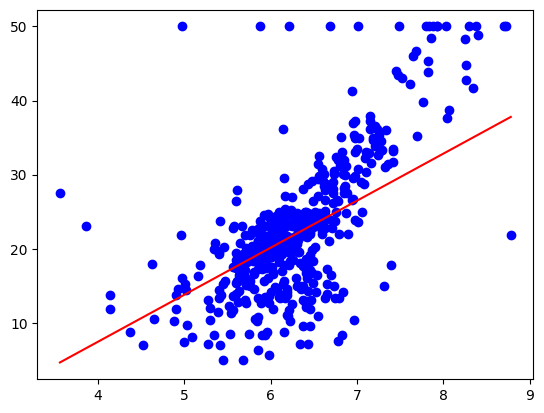

In [125]:
mini_batch_stochastic_gradient_descent(1)

last one loss tf.Tensor(63.168556, shape=(), dtype=float32)


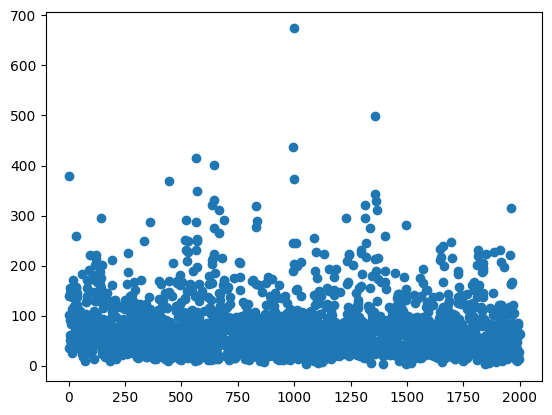

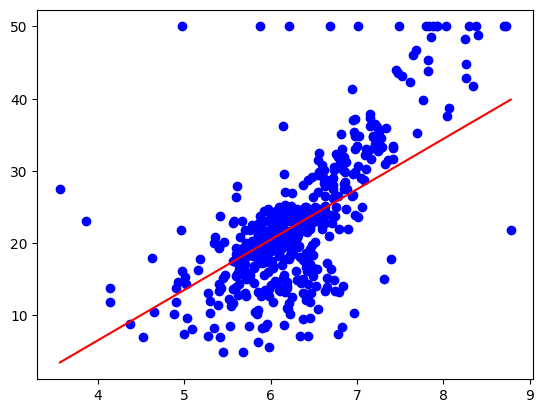

In [126]:
mini_batch_stochastic_gradient_descent(10)

last one loss tf.Tensor(61.794693, shape=(), dtype=float32)


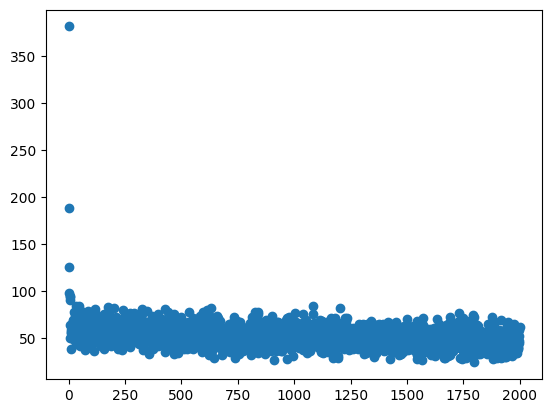

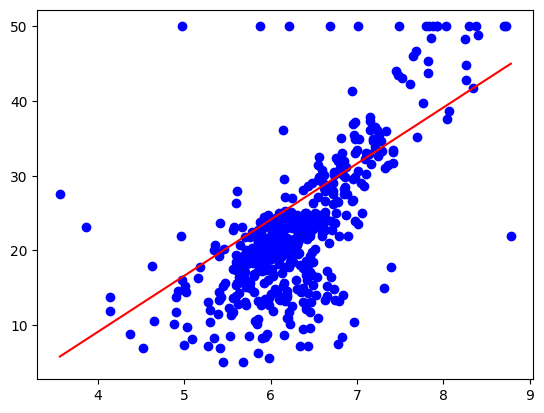

In [127]:
mini_batch_stochastic_gradient_descent(100)

Wykres zmian błędu:

In [ ]:
#do uzupełnienia

In [133]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset))
    np.random.shuffle(arr)
    x_train = x_dataset[arr[0:subset_size]]
    y_train = y_dataset[arr[0:subset_size]]
    return x_train,y_train

In [134]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [138]:
Loss = []
epochs = 2000
learning_rate = 0.01
batch_size = 50
a = tf.Variable(random.random())
b = tf.Variable(random.random())
for _ in range(epochs):
  real_rm_batch,real_medv_batch = subset_dataset(real_x,real_y,batch_size)
  with tf.GradientTape() as tape:
    pred_medv = a * real_rm_batch + b
    loss = loss_fn(real_medv_batch, pred_medv)
    Loss.append(loss.numpy())

  dloss_da, dloss_db = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*dloss_da)  #a = a - alpha*dloss_da
  b.assign_sub(learning_rate*dloss_db)  #b = b - alpha*dloss_db

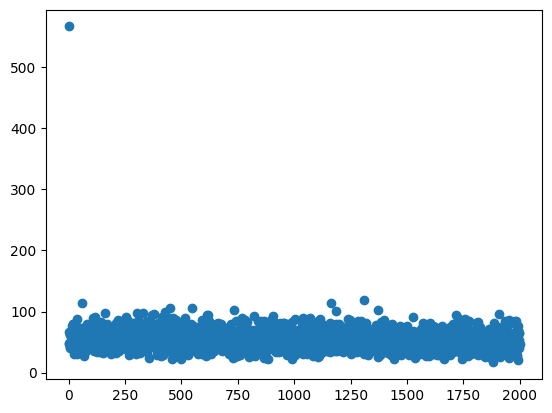

In [139]:
  plt.scatter(np.arange(epochs),Loss)
  plt.show()

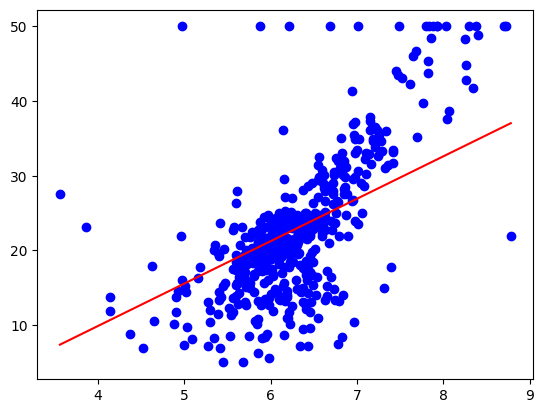

In [140]:
  max = np.max(rm)
  min = np.min(rm)
  X = np.linspace(min, max, num=10)
  plt.plot(X,a.numpy()*X+b.numpy(),c='r')
  plt.scatter(rm,medv,c="b")
  plt.show()


##Podsumowanie


Na uczenie modelu ma najwiekszy wpływ użycie batcha (bez batcha jest podawany cały zbiór uczący), małe batche mogą przyspieszyć proces uczenia, ponieważ aktualizacje wag modelu są wykonywane częściej. Dzięki temu wprowadza to pewną losowość w procesie uczenia, pomoga uniknąć utknięcia w minimach lokalnych. Model uczony z minibatchem osiąga lepsze rezultaty jeżeli chodzi o wyniki uczenia(lepiej znaleziona prosta) oraz mniejszy błąd. Model lepiej i szybciej się uczy gdy mini-batch jest większy niż gdy jest on mniejszy.
Ponadto na proces uczenia modelu ma wpływ ilość epok.
Za mała ilość epok skutkuje niedouczeniem modelu (model nie nauczył się wystarczająco dobrze dostosowywać się do danych treningowych), zaś gdy ilość epok jest zbyt duża następuje przeuczenie modelu (model nieuogulnia zgromadzonej wiedzy tylko "uczy się na pamięć" zbioru treningowego co sprawia, że jest nieskuteczny lub mało skuteczny dla nowych danych).
Ostatnim sprawdzonym przeze mnie parametrem jest współczynnik uczenia.
Jego zbyt duża wartość rowadzi do skakania wokół minimum globalnego przy czym model go nie osiągnie. W przypadku zastosowania zbyt małej wartości współczynnika uczenia proces uczenia jest bardzo wolny, a model "utyka" w minimach lokalnych.
